In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [60]:
df = pd.read_excel('coba1.xlsx')
df

,GDP,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate
0,3745000000000,538800000000,401800000000,6.6,24,4.7
1,2362000000000,893300000000,716700000000,2.2,17.6,10.6
2,310200000000,113000000000,36210000000,2.8,17.2,25
3,1408000000000,162500000000,92910000000,6.4,19.1,8.3
4,251900000000,130700000000,121100000000,4.7,20.4,3.4
...,...,...,...,...,...,...
144,1609000000000,336400000000,329300000000,0.7,19.3,8.6
145,937600000000,172500000000,222000000000,3,25.4,10.4
146,1782000000000,347200000000,439400000000,0.9,16.2,4.8
147,611700000000,86890000000,98100000000,1.9,25.3,5.1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   GDP                                149 non-null    int64 
 1   Exports                            149 non-null    int64 
 2   Imports                            149 non-null    int64 
 3   Industrial production growth rate  149 non-null    object
 4   Investment                         149 non-null    object
 5   Unemployment rate                  149 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.1+ KB


In [62]:
# Menghapus string kosong dengan Nan pada atribut  'Industrial production growth rate', 'Investment', dan 'Unemployment rate'
df['Industrial production growth rate'] = df['Industrial production growth rate'].replace(' ', np.nan)
df['Investment'] = df['Investment'].replace(' ', np.nan)
df['Unemployment rate'] = df['Unemployment rate'].replace(' ', np.nan)

In [63]:
# Mengubah data types menjadi float
df['Industrial production growth rate'] = df['Industrial production growth rate'].astype(float)
df['Investment'] = df['Investment'].astype(float)
df['Unemployment rate'] = df['Unemployment rate'].astype(float)

In [64]:
# Menghapus baris yang memiliki Nan value pada atribut  'Industrial production growth rate', 'Investment', dan 'Unemployment rate'
df.dropna(subset=['Industrial production growth rate'], inplace=True)
df.dropna(subset=['Investment'], inplace=True)
df.dropna(subset=['Unemployment rate'], inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GDP                                116 non-null    int64  
 1   Exports                            116 non-null    int64  
 2   Imports                            116 non-null    int64  
 3   Industrial production growth rate  116 non-null    float64
 4   Investment                         116 non-null    float64
 5   Unemployment rate                  116 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 6.3 KB


In [66]:
# Memilih atribut yang digunakan
data = df[['Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate']]

# Normalisasi data
data = (data - data.min()) / (data.max() - data.min())

In [67]:
class KMeans:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        #Membuat sebuah dictionary kosong yang akan digunakan untuk menyimpan posisi centroid kluster
        self.centroids = {}

        # inisialisasi centroid
        for i in range(self.k):
            self.centroids[i] = data[i]

        # melakukan iterasi sampai konvergensi 
        for i in range(self.max_iter):
            #Membuat dictionary kosong untuk menyimpan anggota kluster pada setiap iterasi
            self.classifications = {}

            # inisialisasi sebagai list kosong
            for i in range(self.k):
                self.classifications[i] = []

            for features in data:
                #perhitungan jarak 
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                #update cluster
                classification = distances.index(min(distances))
                self.classifications[classification].append(features)

            #copy nilai dari self.centroids buat dibandingin sama langkah selanjutnya
            prev_centroids = dict(self.centroids)

            #update centroid
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            #pengecekan konvergensi
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    optimized = False

            if optimized:
                break

        # Menyimpan label kluster untuk setiap titik data
        self.labels_ = []
        for features in data:
            distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.labels_.append(classification)

Cluster 1: 12 data points
Cluster 2: 2 data points
Cluster 3: 102 data points
Silhouette Score: 0.337266375467534


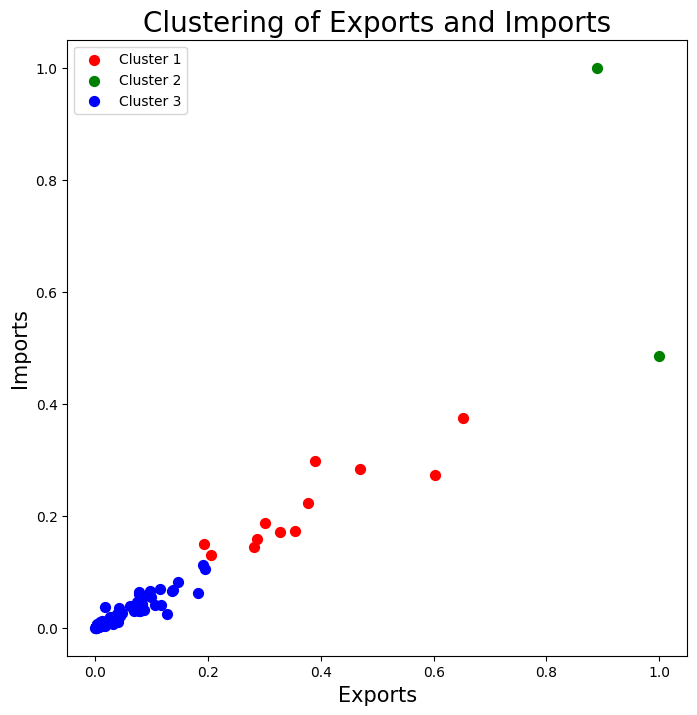

In [79]:
# Menentukan jumlah kluster
k = 3
clf = KMeans(k)
clf.fit(data.values)

# Mengambil hasil label kluster
labels = clf.labels_

# Menghitung jumlah titik data dalam setiap kluster
cluster_counts = np.bincount(labels)

# Menampilkan jumlah titik data dalam setiap kluster
for i in range(k):
    print(f"Cluster {i+1}: {cluster_counts[i]} data points")

# Menghitung skor Silhouette
print("Silhouette Score:", silhouette_score(data, labels))

# Membuat plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Exports', fontsize=15)
ax.set_ylabel('Imports', fontsize=15)
ax.set_title('Clustering of Exports and Imports', fontsize=20)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(k):
    indicesToKeep = [j for j, label in enumerate(clf.labels_) if label == i]
    ax.scatter(data.iloc[indicesToKeep, 0], data.iloc[indicesToKeep, 1], c=colors[i], label=f'Cluster {i+1}', s=50)

ax.legend()
plt.show()

Cluster 1: 10 data points
Cluster 2: 2 data points
Cluster 3: 21 data points
Cluster 4: 83 data points
Silhouette Score: 0.3888610580272102


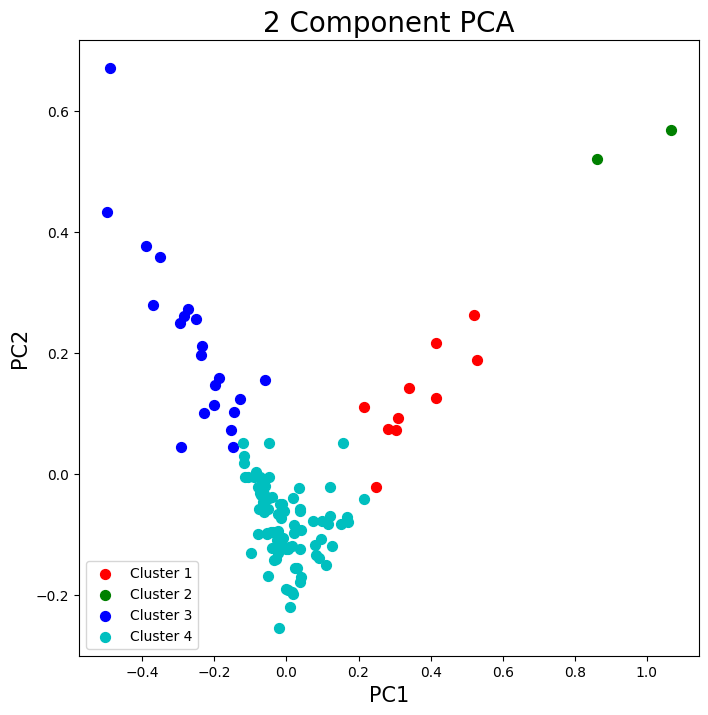

In [80]:
# Menentukan jumlah kluster
k = 4
clf = KMeans(k)
clf.fit(data.values)

# Mengambil hasil label kluster
labels = clf.labels_

# Menghitung jumlah titik data dalam setiap kluster
cluster_counts = np.bincount(labels)

# Menampilkan jumlah titik data dalam setiap kluster
for i in range(k):
    print(f"Cluster {i+1}: {cluster_counts[i]} data points")

# Menghitung skor Silhouette
print("Silhouette Score:", silhouette_score(data, labels))

# Membuat plot dengan PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i in range(k):
    indicesToKeep = [j for j, label in enumerate(clf.labels_) if label == i]
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1'], principalDf.loc[indicesToKeep, 'PC2'], c=colors[i], label=f'Cluster {i+1}', s=50)

ax.legend()
plt.show()